MRI shape (x, y, z): (256, 256, 166)


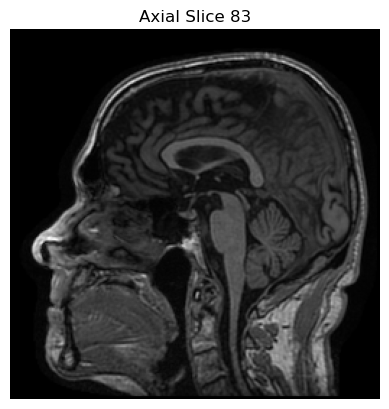

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

img = nib.load(nii_file)
data = img.get_fdata()
print("MRI shape (x, y, z):", data.shape)

mid = data.shape[2] // 2
plt.imshow(data[:, :, mid], cmap='gray')
plt.title(f'Axial Slice {mid}')
plt.axis('off')
plt.show()


In [3]:
import os

base_dir = "."  # this points to ADNI/ADNI, where your subject folders live

# Print all subdirectories inside the current ADNI/ADNI folder
for root, dirs, files in os.walk(base_dir):
    for name in dirs:
        full_path = os.path.join(root, name)
        print("Found folder:", full_path)

Found folder: .\.ipynb_checkpoints
Found folder: .\002_S_0295
Found folder: .\002_S_0413
Found folder: .\002_S_0619
Found folder: .\002_S_0685
Found folder: .\002_S_0729
Found folder: .\002_S_0782
Found folder: .\002_S_0938
Found folder: .\002_S_1018
Found folder: .\002_S_1070
Found folder: .\002_S_1155
Found folder: .\002_S_1261
Found folder: .\002_S_1268
Found folder: .\002_S_1280
Found folder: .\003_S_1122
Found folder: .\005_S_0221
Found folder: .\005_S_0223
Found folder: .\005_S_0324
Found folder: .\005_S_0546
Found folder: .\005_S_0553
Found folder: .\005_S_0602
Found folder: .\005_S_0610
Found folder: .\005_S_0814
Found folder: .\005_S_1224
Found folder: .\005_S_1341
Found folder: .\006_S_0547
Found folder: .\006_S_1130
Found folder: .\007_S_0041
Found folder: .\007_S_0068
Found folder: .\007_S_0101
Found folder: .\007_S_0128
Found folder: .\007_S_0249
Found folder: .\007_S_0293
Found folder: .\007_S_0316
Found folder: .\007_S_0698
Found folder: .\007_S_1206
Found folder: .\007_

In [4]:
import os
import nibabel as nib
import numpy as np
import cv2

# Change this to your ADNI root folder
base_dir = "."
output_dir = "slices_output"
os.makedirs(output_dir, exist_ok=True)

def extract_and_save_slices(nii_path, output_dir, max_slices=10):
    try:
        img = nib.load(nii_path)
        data = img.get_fdata()
        mid = data.shape[2] // 2

        subject_id = os.path.basename(nii_path).split("_")[1]
        subject_folder = os.path.join(output_dir, f"subject_{subject_id}")
        os.makedirs(subject_folder, exist_ok=True)

        for i in range(-max_slices//2, max_slices//2):
            idx = mid + i
            if idx < 0 or idx >= data.shape[2]:
                continue
            slice_2d = data[:, :, idx]
            norm = cv2.normalize(slice_2d, None, 0, 255, cv2.NORM_MINMAX)
            norm = norm.astype(np.uint8)
            filename = os.path.join(subject_folder, f"slice_{idx:03d}.png")
            cv2.imwrite(filename, norm)
    except Exception as e:
        print(f"Error processing {nii_path}: {e}")

nii_files = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".nii") or file.endswith(".nii.gz"):
            nii_files.append(os.path.join(root, file))

print(f"Found {len(nii_files)} NIfTI files.")

for nii in nii_files:
    extract_and_save_slices(nii, output_dir)


Found 2182 NIfTI files.


In [5]:
import os

output_dir = "slices_output"
num_subjects = 0
num_pngs = 0

for root, dirs, files in os.walk(output_dir):
    if any(f.endswith(".png") for f in files):
        num_subjects += 1
        num_pngs += sum(1 for f in files if f.endswith(".png"))

print(f"Found {num_subjects} subjects with a total of {num_pngs} PNG slices.")


Found 2231 subjects with a total of 22466 PNG slices.


In [6]:
import os
import nibabel as nib
import numpy as np
import cv2

base_dir = "."  # Or your actual root dir
output_dir = "slices_output"
os.makedirs(output_dir, exist_ok=True)

def extract_and_save_slices(nii_path, output_dir, max_slices=10):
    try:
        img = nib.load(nii_path)
        data = img.get_fdata()
        mid = data.shape[2] // 2

        subject_id = os.path.basename(nii_path).split(".")[0]
        subject_folder = os.path.join(output_dir, f"subject_{subject_id}")

        # ✅ Skip if folder already exists and has PNGs
        if os.path.exists(subject_folder) and any(fname.endswith(".png") for fname in os.listdir(subject_folder)):
            print(f"Skipping {subject_id} — already processed.")
            return

        os.makedirs(subject_folder, exist_ok=True)

        for i in range(-max_slices//2, max_slices//2):
            idx = mid + i
            if idx < 0 or idx >= data.shape[2]:
                continue

            slice_2d = data[:, :, idx]
            norm = cv2.normalize(slice_2d, None, 0, 255, cv2.NORM_MINMAX)
            norm = norm.astype(np.uint8)
            filename = os.path.join(subject_folder, f"slice_{idx:03d}.png")
            cv2.imwrite(filename, norm)

    except Exception as e:
        print(f" Error processing {nii_path}: {e}")

#  Collect all .nii/.nii.gz files
nii_files = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".nii") or file.endswith(".nii.gz"):
            nii_files.append(os.path.join(root, file))

print(f" Found {len(nii_files)} NIfTI files.")

# Run the extraction safely (can be stopped/resumed)
for nii_path in nii_files:
    extract_and_save_slices(nii_path, output_dir)

print(" Done.")


 Found 2182 NIfTI files.
Skipping ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108 — already processed.
Skipping ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070219173850420_S21856_I40966 — already processed.
Skipping ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070802163833409_S32678_I64025 — already processed.
Skipping ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20081026123329555_S54061_I123685 — already processed.
Skipping ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20090723154406768_S67612_I150177 — already processed.
Skipping ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001114556321_S13408_I118671 — already processed.
Skipping ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001120532722_S21856_I118692 — already processed.
Skipping ADNI_002_S_0413_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319115331858_S1

In [7]:
import pandas as pd

# Load the metadata CSV
meta_path = "ADNI1_Complete_3Yr_1.5T_7_09_2025.csv"
metadata = pd.read_csv(meta_path)

# Display basic info
print("Columns:", metadata.columns.tolist())
metadata.head()

Columns: ['Image Data ID', 'Subject', 'Group', 'Sex', 'Age', 'Visit', 'Modality', 'Description', 'Type', 'Acq Date', 'Format', 'Downloaded']


,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I63874,941_S_1202,CN,M,78,sc,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,1/30/2007,NiFTI,NaN
1,I204843,941_S_1202,CN,M,81,m36,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/14/2010,NiFTI,NaN
2,I137298,941_S_1202,CN,M,80,m24,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/17/2009,NiFTI,NaN
3,I75150,941_S_1202,CN,M,78,m06,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/24/2007,NiFTI,NaN
4,I105437,941_S_1202,CN,M,79,m12,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/28/2008,NiFTI,NaN


In [8]:
import os
import shutil
import pandas as pd
import re 

# Load metadata and create mapping
meta_path = "ADNI1_Complete_3Yr_1.5T_7_09_2025.csv"
metadata = pd.read_csv(meta_path)
metadata['Subject'] = metadata['Subject'].astype(str)

# Get subject → group mapping
subject_to_group = metadata[['Subject', 'Group']].drop_duplicates()

# Define paths
input_dir = "slices_output"    # Where your PNGs currently are
output_dir = "classified_slices"  # Where you want organized folders to go
os.makedirs(output_dir, exist_ok=True)

# Loop through each subject folder
for folder_name in os.listdir(input_dir):
    if not folder_name.startswith("subject_"):
        continue

    match = re.search(r'\d{3}_S_\d{4}', folder_name)
    if not match:
        print(f"No valid subject ID found in: {folder_name}")
        continue
    subject_id = match.group()

    group_row = subject_to_group[subject_to_group['Subject'].str.contains(subject_id)]
    if group_row.empty:
        print(f"No metadata for subject: {subject_id} (from {folder_name})")
        continue

    group = group_row['Group'].values[0]
    group_folder = os.path.join(output_dir, group)
    os.makedirs(group_folder, exist_ok=True)

    # Copy PNGs
    subject_path = os.path.join(input_dir, folder_name)
    for file in os.listdir(subject_path):
        if file.endswith(".png"):
            src_file = os.path.join(subject_path, file)
            dst_file = os.path.join(group_folder, f"{subject_id}_{file}")
            shutil.copyfile(src_file, dst_file)

print("Done organizing images into CN / MCI / AD folders.")


No valid subject ID found in: subject_002
No valid subject ID found in: subject_003
No valid subject ID found in: subject_005
No valid subject ID found in: subject_006
No valid subject ID found in: subject_007
No valid subject ID found in: subject_010
No valid subject ID found in: subject_011
No valid subject ID found in: subject_012
No valid subject ID found in: subject_013
No valid subject ID found in: subject_014
No valid subject ID found in: subject_016
No valid subject ID found in: subject_018
No valid subject ID found in: subject_020
No valid subject ID found in: subject_021
No valid subject ID found in: subject_022
No valid subject ID found in: subject_023
No valid subject ID found in: subject_024
No valid subject ID found in: subject_027
No valid subject ID found in: subject_029
No valid subject ID found in: subject_031
No valid subject ID found in: subject_032
No valid subject ID found in: subject_033
No valid subject ID found in: subject_035
No valid subject ID found in: subj

In [9]:
import os

base_dir = "classified_slices"
for group in ["CN", "MCI", "AD"]:
    group_path = os.path.join(base_dir, group)
    num_files = len([f for f in os.listdir(group_path) if f.endswith(".png")])
    print(f"{group}: {num_files} images")

CN: 1564 images
MCI: 1828 images
AD: 1242 images


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

# Base path to your classified images
data_dir = "classified_slices"


In [11]:
img_size = (128, 128)  # Resize all images to same size
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)


Found 4635 files belonging to 3 classes.
Using 3708 files for training.
Found 4635 files belonging to 3 classes.
Using 927 files for validation.


In [12]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [13]:
model = models.Sequential([
    tf.keras.Input(shape=(128, 128, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3)  # 3 classes
])


In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.4201 - loss: 1.1046 - val_accuracy: 0.5318 - val_loss: 0.9215
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.7393 - loss: 0.6286 - val_accuracy: 0.8662 - val_loss: 0.3772
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.9087 - loss: 0.2642 - val_accuracy: 0.9061 - val_loss: 0.2445
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9362 - loss: 0.1730 - val_accuracy: 0.9126 - val_loss: 0.2502
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9486 - loss: 0.1460 - val_accuracy: 0.9191 - val_loss: 0.1865
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.9416 - loss: 0.1181 - val_accuracy: 0.9094 - val_loss: 0.2009
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.9346 - loss: 0.1322 - val_accuracy: 0.9008 - val_loss: 0.1957
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.9444 - loss: 0.1095 - val_acc

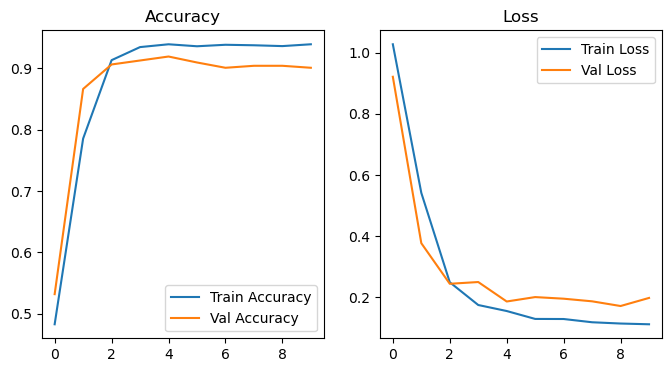

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [16]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense

inputs = Input(shape=(128, 128, 3))  # Define input
x = Rescaling(1./255)(inputs)
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(3)(x)  # No softmax if you're using from_logits=True

cam_model = Model(inputs=inputs, outputs=outputs)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..237.5].


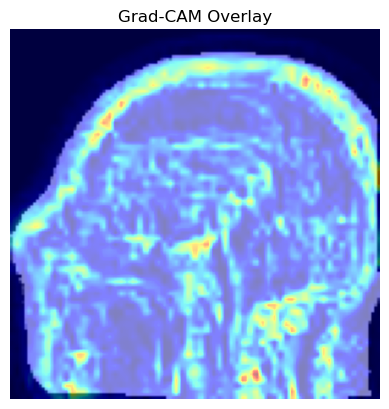

In [17]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
import numpy as np
import matplotlib.pyplot as plt

# Select a class index, e.g., 0 for CN, 1 for MCI, 2 for AD
score = CategoricalScore([1])  # Example: MCI

# Create GradCAM object
gradcam = Gradcam(cam_model, model_modifier=ReplaceToLinear(), clone=True)

# Pick one image
img = next(iter(val_ds))[0][0]  # First image in the validation batch

# Create heatmap
cam = gradcam(score, img[np.newaxis, ...])
heatmap = cam[0]

# Display
plt.imshow(img)
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.title("Grad-CAM Overlay")
plt.axis('off')
plt.show()


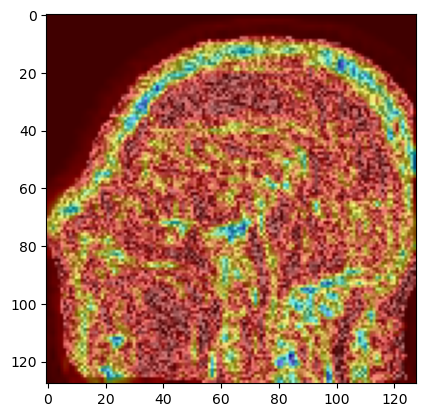

In [18]:
import cv2
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
overlayed = cv2.addWeighted(heatmap, 0.5, np.uint8(img * 255), 0.5, 0)
plt.imshow(overlayed)


In [19]:
import os
os.makedirs("gradcam_output", exist_ok=True)


In [20]:
plt.imsave(f"gradcam_output/{subject_id}_gradcam.png", overlayed)


In [21]:
import os
os.makedirs("gradcam_output", exist_ok=True)


In [22]:
os.makedirs("gradcam_output", exist_ok=True)

gradcam = Gradcam(cam_model, model_modifier=ReplaceToLinear(), clone=True)

for i, (img_3d, label) in enumerate(val_ds.take(5)):  # just 5 3D volumes to start
    img_3d = img_3d.numpy()

    # Loop through each 2D slice (assuming shape is [slices, 128, 128])
    for j, slice_2d in enumerate(img_3d):
        # Fix grayscale to 3 channels
        if slice_2d.ndim == 2:
            slice_2d = np.stack((slice_2d,) * 3, axis=-1)

        img_batch = np.expand_dims(slice_2d, axis=0)  # shape: (1, 128, 128, 3)

        pred = cam_model.predict(img_batch)
        pred_class = np.argmax(pred)

        score = CategoricalScore([pred_class])
        cam = gradcam(score, img_batch)
        heatmap = cam[0]

        # Save overlay
        plt.imshow(slice_2d)
        plt.imshow(heatmap, cmap='jet', alpha=0.5)
        plt.axis('off')
        save_path = f"gradcam_output/subject_{i}_slice_{j}_class_{pred_class}_gradcam.png"
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
        plt.close()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..237.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..239.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..234.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..240.9375].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..231.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..221.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..223.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..225.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..213.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..232.375].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..228.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..220.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..174.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..225.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1875..223.09375].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..226.1875].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..221.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..232.5625].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..244.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..224.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..216.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..229.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..223.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..205.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..241.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..219.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..234.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..209.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..214.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..230.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..228.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..237.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..239.5625].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..233.8125].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..228.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..226.4375].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..229.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..198.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..228.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..217.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..240.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..211.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..228.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..230.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..241.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..212.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..231.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..221.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..228.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..240.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..246.4375].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..237.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..220.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..237.4375].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..205.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..224.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..233.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..249.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..207.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..233.0625].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..237.4375].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..225.6875].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..225.86328].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..208.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..233.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.09375..207.71875].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..224.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..236.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..220.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..244.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..237.6875].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..225.9375].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..223.05469].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..213.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..238.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..235.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..198.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..214.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..235.6875].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..237.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..238.375].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..229.625].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..216.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..224.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..212.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..233.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.15625..244.96875].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..236.625].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..212.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..223.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..240.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..218.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..220.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..227.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..218.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..223.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.15625..224.40625].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..239.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.59375..209.90625].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..228.375].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..216.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..230.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..219.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..238.3125].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..230.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..250.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..225.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..226.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..232.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..211.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..228.875].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..222.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..232.875].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..216.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..220.875].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..231.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..228.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..200.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..220.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..215.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..241.125].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..203.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..216.15234].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..228.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..225.5625].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..218.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..246.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..241.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..244.1875].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..239.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..225.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..228.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..233.4375].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..243.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..240.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..226.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..238.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..240.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..229.375].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..240.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..233.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..242.59766].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..249.8125].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..238.625].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..229.75].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..220.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..242.625].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..223.0625].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..238.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..227.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..232.6875].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..226.875].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..230.5].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..212.8125].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..217.9375].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..219.0].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..231.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..235.625].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..239.25].


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..235.5].


In [23]:
# Final evaluation on validation set
val_loss, val_acc = model.evaluate(val_ds, verbose=0)
print(f"Validation Accuracy: {val_acc:.2%}")


Validation Accuracy: 90.08%


In [24]:
import pandas as pd
meta_df = pd.read_csv("ADNI1_Complete_3Yr_1.5T_7_09_2025.csv")


In [25]:
save_path = f"gradcam_output/{subject_id}_class_{pred_class}_gradcam.png"


In [26]:
# Example: correlate Grad-CAM intensities with tau levels
for img_file in os.listdir("gradcam_output"):
    subject_id = img_file.split("_")[0]
    biomarker_row = meta_df[meta_df["Subject"] == subject_id]
    # then store mean activation, diagnosis, etc.


In [27]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

# 0) sanity: make sure validation set isn't shuffled
# (only needed at dataset build time)
# val_ds = val_ds.shuffle(1, reshuffle_each_iteration=False)  # <- don't do this

# 1) headline metrics from Keras
val_loss, val_acc = model.evaluate(val_ds, verbose=0)
print(f"val_loss: {val_loss:.4f}  val_acc: {val_acc:.4f}")

# 2) detailed report
y_true, y_pred, probs = [], [], []

for imgs, labels in val_ds:
    logits = model.predict(imgs, verbose=0)             # your Dense(3) without softmax → logits
    p = tf.nn.softmax(logits, axis=1).numpy()           # convert to probabilities
    probs.extend(p.tolist())
    y_pred.extend(np.argmax(p, axis=1).tolist())

    lab = labels.numpy()
    if lab.ndim > 1 and lab.shape[-1] > 1:              # handle one-hot
        lab = np.argmax(lab, axis=1)
    y_true.extend(lab.tolist())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# class names (works if you used image_dataset_from_directory)
try:
    class_names = val_ds.class_names
except AttributeError:
    class_names = [str(i) for i in range(int(np.max(y_true))+1)]

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=class_names, digits=3))
print("Balanced accuracy:", balanced_accuracy_score(y_true, y_pred))


val_loss: 0.1982  val_acc: 0.9008
[[206   5  15]
 [ 10 292  20]
 [ 25  17 337]]
              precision    recall  f1-score   support

           0      0.855     0.912     0.882       226
           1      0.930     0.907     0.918       322
           2      0.906     0.889     0.897       379

    accuracy                          0.901       927
   macro avg      0.897     0.903     0.899       927
weighted avg      0.902     0.901     0.901       927

Balanced accuracy: 0.9025062603209668


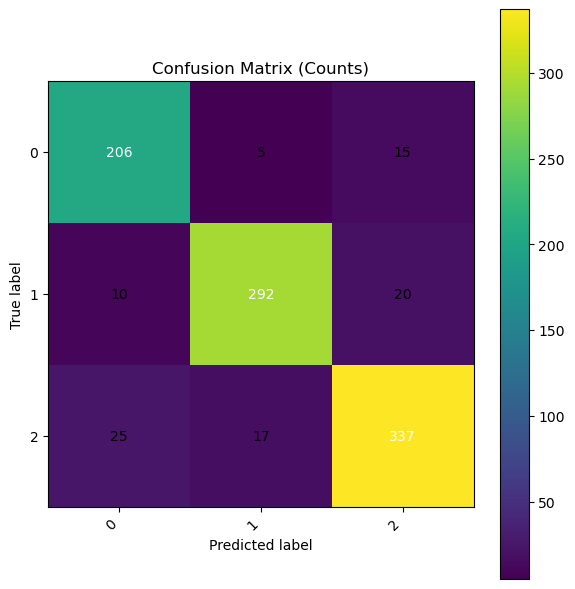

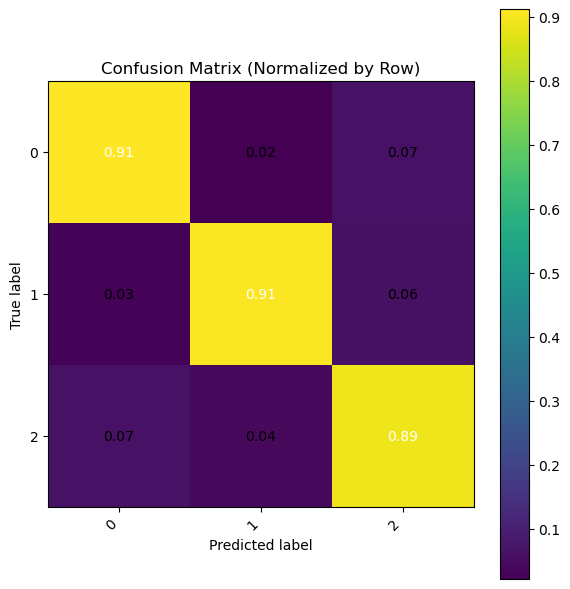

Saved figures/cm_counts.png and figures/cm_normalized.png
Saved figures\classification_report.csv


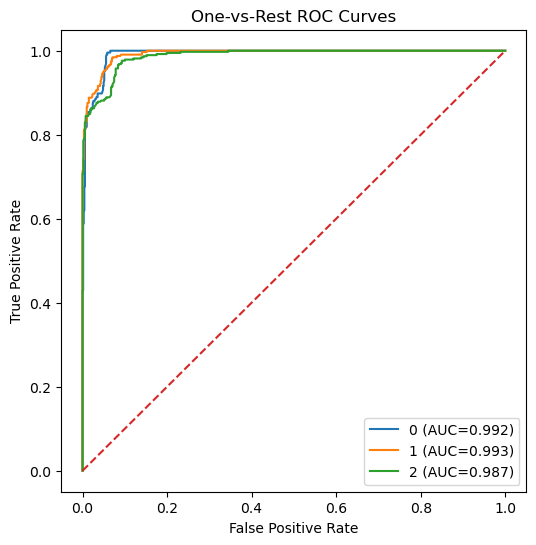

Saved figures\roc_curves.png


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools
import pandas as pd
import os

# Ensure outputs folder
os.makedirs("figures", exist_ok=True)

# 1) Confusion matrices (raw and normalized)
cm_raw = confusion_matrix(y_true, y_pred)
cm_norm = cm_raw.astype(float) / (cm_raw.sum(axis=1, keepdims=True) + 1e-12)

def plot_cm(cm, labels, title, fname):
    fig = plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, ha='right')
    plt.yticks(tick_marks, labels)

    # annotate cells
    thresh = cm.max() * 0.6
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        val = cm[i, j]
        txt = f"{val:.2f}" if cm.dtype.kind == 'f' else str(val)
        plt.text(j, i, txt,
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if val > thresh else "black",
                 fontsize=10)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(os.path.join("figures", fname), dpi=200, bbox_inches="tight")
    plt.show()

plot_cm(cm_raw,  class_names, "Confusion Matrix (Counts)",  "cm_counts.png")
plot_cm(cm_norm, class_names, "Confusion Matrix (Normalized by Row)", "cm_normalized.png")

print("Saved figures/cm_counts.png and figures/cm_normalized.png")

# 2) Save classification report to CSV
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).T
csv_path = os.path.join("figures", "classification_report.csv")
df_report.to_csv(csv_path)
print(f"Saved {csv_path}")

# 3) (Optional) Per-class ROC curves (one-vs-rest) — requires 'probs'
if isinstance(probs, (list, np.ndarray)) and len(np.array(probs).shape) == 2:
    probs = np.asarray(probs)
    n_classes = probs.shape[1]
    y_true_ovr = np.eye(n_classes)[np.asarray(y_true)]  # one-hot

    plt.figure(figsize=(6, 6))
    for c in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_ovr[:, c], probs[:, c])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{class_names[c]} (AUC={roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], linestyle='--')  # chance
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC Curves")
    plt.legend()
    roc_path = os.path.join("figures", "roc_curves.png")
    plt.savefig(roc_path, dpi=200, bbox_inches="tight")
    plt.show()
    print(f"Saved {roc_path}")
else:
    print("Skipped ROC curves (no 'probs' available).")


In [29]:
from sklearn.metrics import balanced_accuracy_score

# headline metrics
bal_acc = balanced_accuracy_score(y_true, y_pred)

metrics_md = f"""
| Metric              | Value   |
|---------------------|---------|
| Validation Loss     | {val_loss:.4f} |
| Validation Accuracy | {val_acc:.4f} |
| Balanced Accuracy   | {bal_acc:.4f} |
"""

print(metrics_md)



| Metric              | Value   |
|---------------------|---------|
| Validation Loss     | 0.1982 |
| Validation Accuracy | 0.9008 |
| Balanced Accuracy   | 0.9025 |



In [31]:
# === Link Grad-CAM overlays to ADNI metadata and save metrics ===
import os, re
import numpy as np
import pandas as pd
import cv2

GRADCAM_DIR = "gradcam_output"   # change if needed
OUT_CSV     = "gradcam_tau_link.csv"

# --- helpers to find likely column names in the metadata ---
def find_col(df, candidates):
    cols = {c.lower(): c for c in df.columns}
    for cand in candidates:
        for c in cols:
            if cand in c:
                return cols[c]
    return None

subject_col = find_col(meta_df, ["subject", "rid", "id", "participant"])
tau_col     = find_col(meta_df, ["tau", "ptau", "ptau181", "tau_total"])
dx_col      = find_col(meta_df, ["dx", "diagnosis", "group", "label"])

if subject_col is None:
    raise ValueError("Couldn't find a subject ID column in meta_df. "
                     "Rename the subject column to include 'Subject' or update the code.")

print(f"Using columns → subject: '{subject_col}'"
      f"{', tau: ' + tau_col if tau_col else ''}"
      f"{', diagnosis: ' + dx_col if dx_col else ''}")

rows = []

# regex: take everything up to the first underscore as subject_id (fallback to basename without ext)
def extract_subject_id(fname):
    m = re.match(r"^([A-Za-z0-9\-]+)_", fname)
    return m.group(1) if m else os.path.splitext(fname)[0]

for fname in os.listdir(GRADCAM_DIR):
    if not fname.lower().endswith((".png", ".jpg", ".jpeg", ".webp")):
        continue

    subject_id = extract_subject_id(fname)

    # load Grad-CAM image
    path = os.path.join(GRADCAM_DIR, fname)
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if img is None:
        print(f"Warning: could not read {path}")
        continue

    # to grayscale float [0,1]
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cam = img.astype(np.float32)
    if cam.max() > 1.0:
        cam /= 255.0

    # intensity metrics
    mean_int   = float(np.mean(cam))
    max_int    = float(np.max(cam))
    p95_int    = float(np.percentile(cam, 95))
    hot_area60 = float(np.mean(cam >= 0.60))  # fraction of pixels ≥ 0.60
    hot_area80 = float(np.mean(cam >= 0.80))  # fraction of pixels ≥ 0.80
    entropy    = float(-(cam[cam>0] * np.log(cam[cam>0] + 1e-12)).mean()) if np.any(cam>0) else 0.0

    # lookup metadata row (first match)
    mrow = meta_df.loc[meta_df[subject_col].astype(str) == str(subject_id)]
    tau_val = float(mrow.iloc[0][tau_col]) if (tau_col and len(mrow)>0 and pd.api.types.is_numeric_dtype(type(mrow.iloc[0][tau_col]))) else (
              float(pd.to_numeric(mrow.iloc[0][tau_col], errors="coerce")) if (tau_col and len(mrow)>0) else np.nan)
    dx_val  = mrow.iloc[0][dx_col] if (dx_col and len(mrow)>0) else np.nan

    rows.append({
        "subject": subject_id,
        "file": fname,
        "gradcam_mean": mean_int,
        "gradcam_max": max_int,
        "gradcam_p95": p95_int,
        "hot_area_0p60": hot_area60,
        "hot_area_0p80": hot_area80,
        "entropy": entropy,
        "diagnosis": dx_val,
        "tau": tau_val
    })

link_df = pd.DataFrame(rows)
link_df.to_csv(OUT_CSV, index=False)
print(f"Saved {OUT_CSV} with {len(link_df)} rows")

# quick peek
display_cols = ["subject","diagnosis","tau","gradcam_mean","gradcam_p95","hot_area_0p60","hot_area_0p80"]
print(link_df[display_cols].head(10))

# quick correlations (if tau is present)
if "tau" in link_df.columns:
    # numeric-only corr; Spearman is robust to nonlinearity
    corr_spear = link_df[["tau","gradcam_mean","gradcam_p95","hot_area_0p60","hot_area_0p80"]].corr(method="spearman")
    corr_pear  = link_df[["tau","gradcam_mean","gradcam_p95","hot_area_0p60","hot_area_0p80"]].corr(method="pearson")
    print("\nSpearman correlations with tau:\n", corr_spear["tau"].sort_values(ascending=False))
    print("\nPearson correlations with tau:\n",  corr_pear["tau"].sort_values(ascending=False))
else:
    print("No 'tau' column found; skipped correlations.")


Using columns → subject: 'Subject', diagnosis: Group
Saved gradcam_tau_link.csv with 453 rows
   subject  diagnosis  tau  gradcam_mean  gradcam_p95  hot_area_0p60  \
0      941        NaN  NaN      0.407077     0.784314       0.224854   
1  subject        NaN  NaN      0.550302     0.878431       0.531062   
2  subject        NaN  NaN      0.430285     0.529412       0.001403   
3  subject        NaN  NaN      0.625318     0.898039       0.705870   
4  subject        NaN  NaN      0.481135     0.862745       0.250064   
5  subject        NaN  NaN      0.526357     0.874510       0.499945   
6  subject        NaN  NaN      0.606646     0.901961       0.679394   
7  subject        NaN  NaN      0.598718     0.886275       0.712164   
8  subject        NaN  NaN      0.423508     0.529412       0.000742   
9  subject        NaN  NaN      0.579837     0.878431       0.701897   

   hot_area_0p80  
0       0.040771  
1       0.157005  
2       0.000646  
3       0.388143  
4       0.077643  